In [168]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

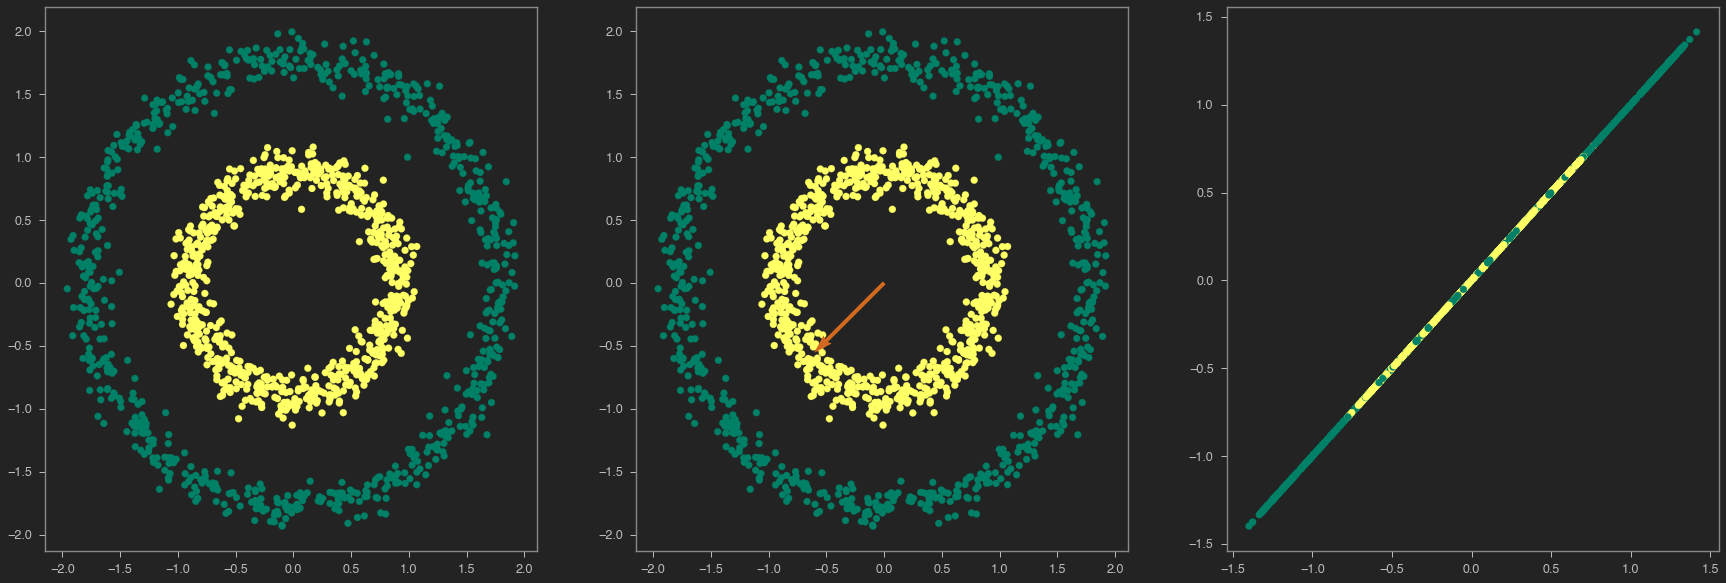

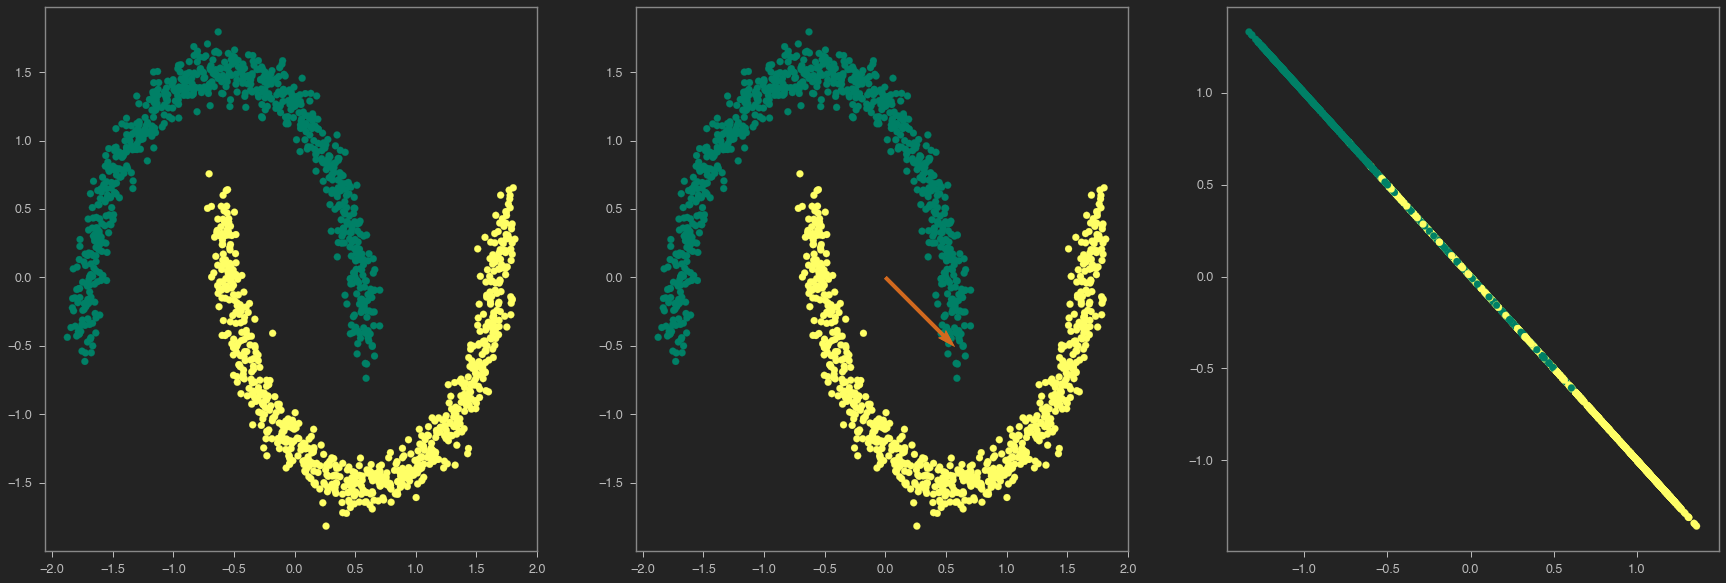

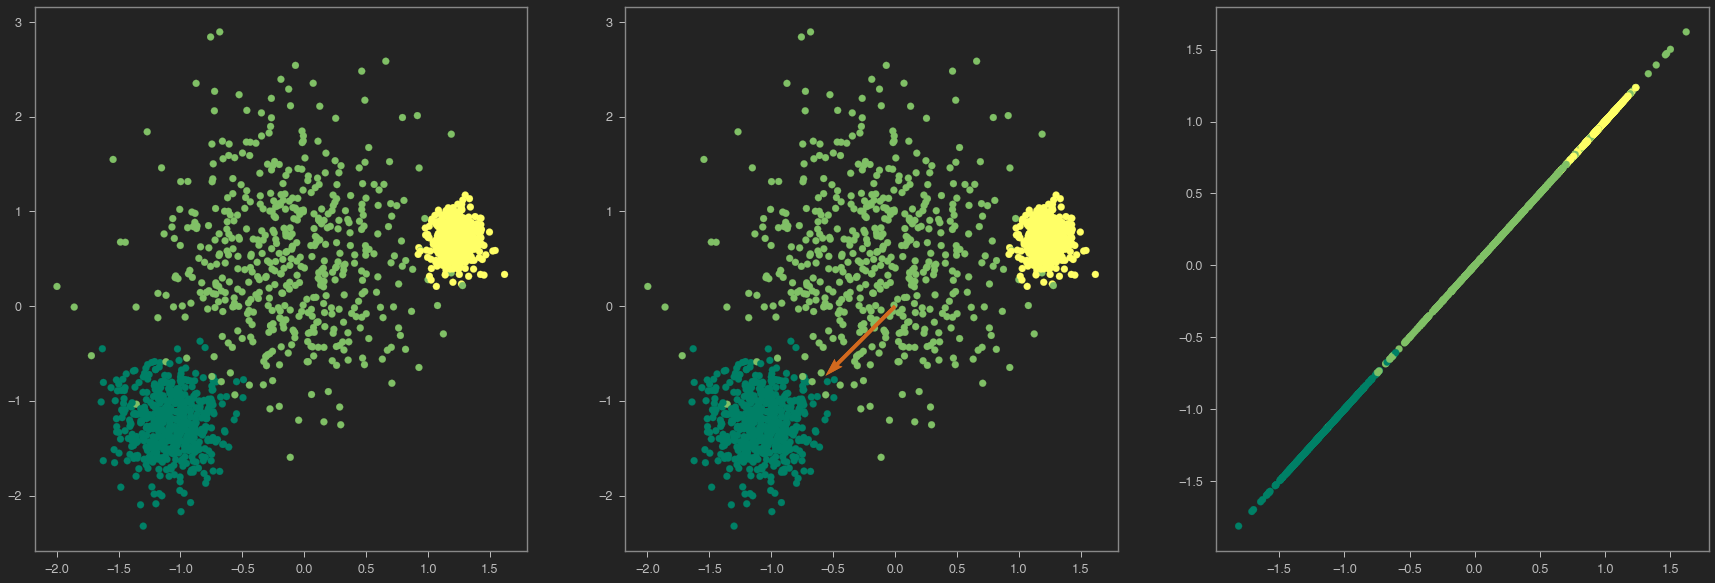

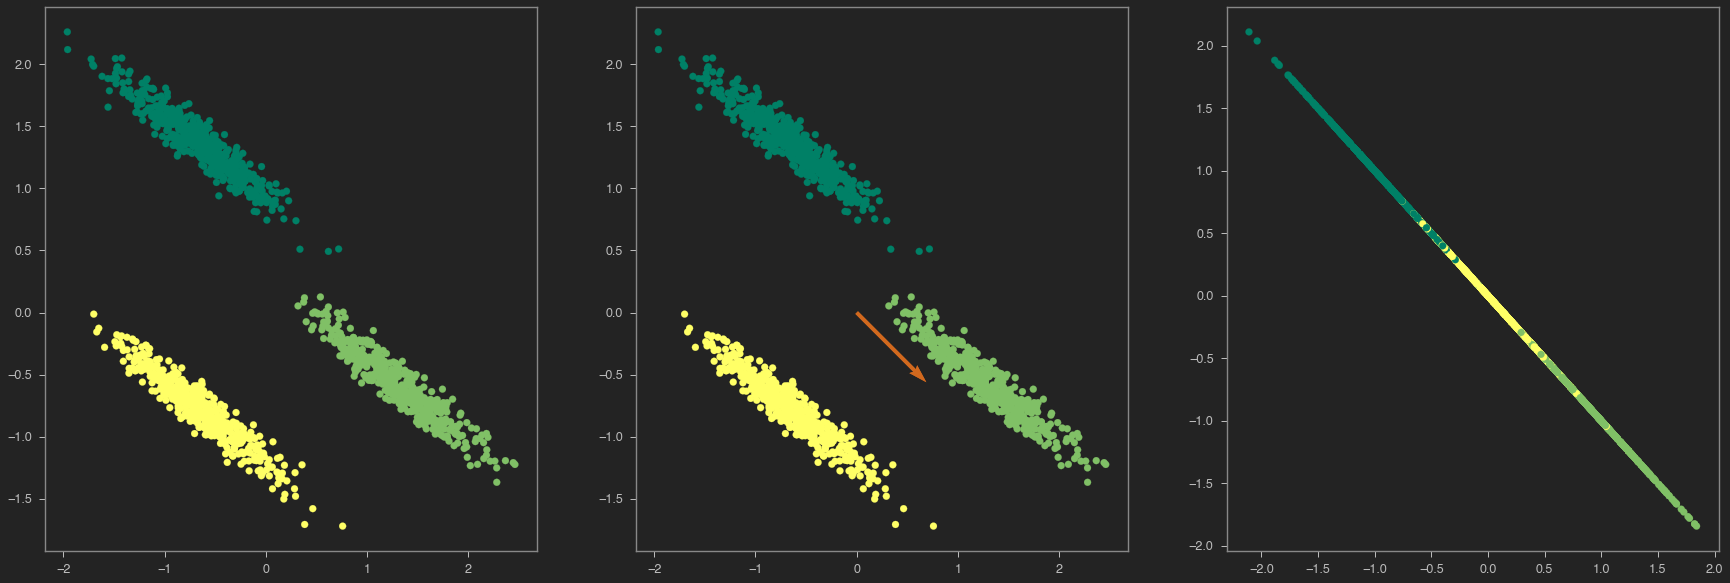

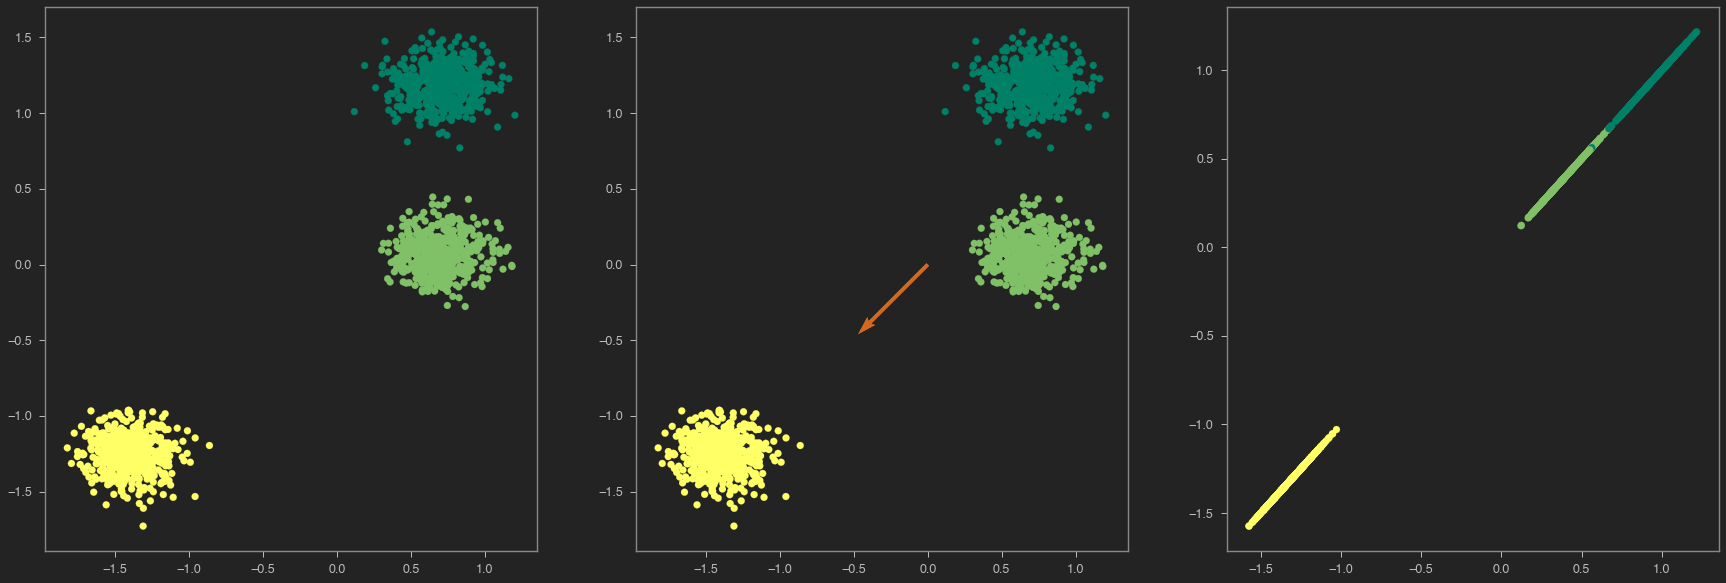

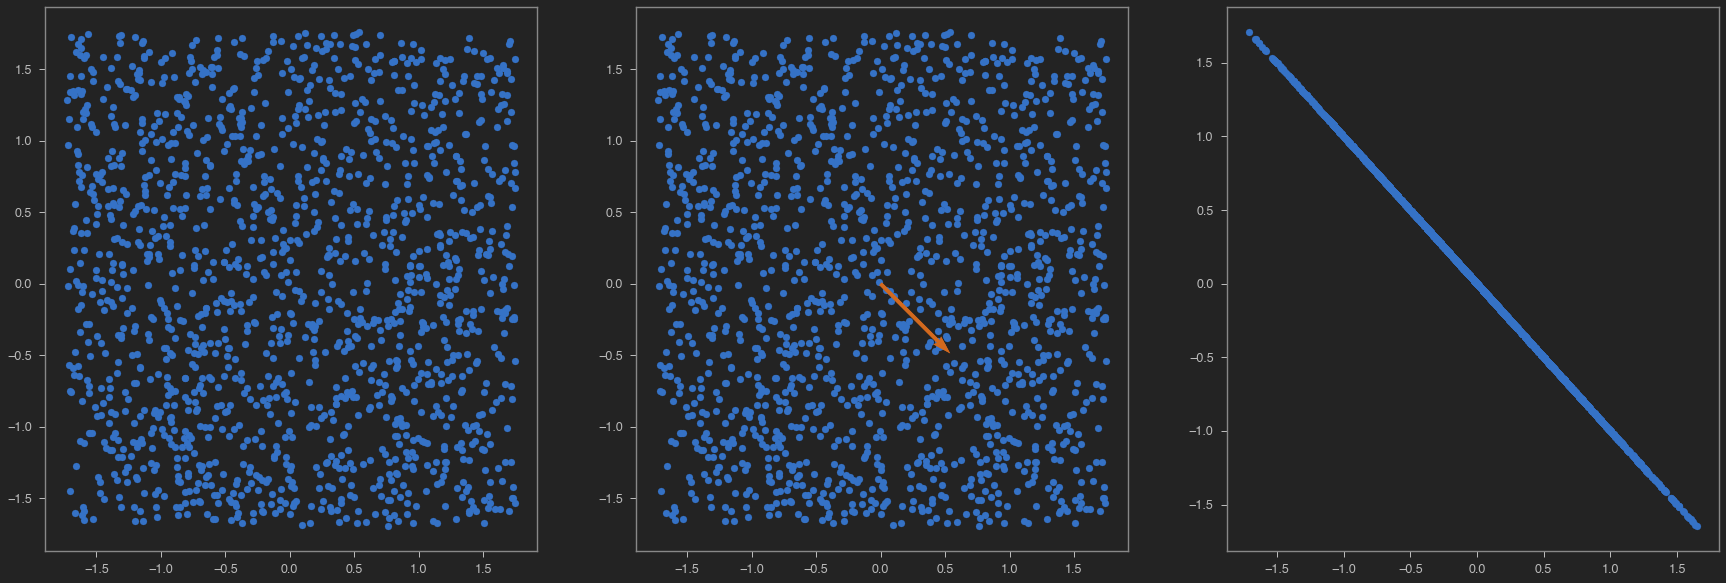

In [155]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=8)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
    cov = np.cov(X.T)
    #print("Covariance Matrix:\n",cov)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    eig_vecs = eig_vecs.T
    eigen_values_sorted = np.argsort(eig_vals)
    max_eig = eigen_values_sorted[1]
    min_eig = eigen_values_sorted[0]
    #print(eig_vecs)
    #print("Max EigenValue:",eig_vecs[max_eig])
   # print(eig_vals)
    plt.subplot(1,3,2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
    plt.quiver([0,0],[0,0], eig_vecs[max_eig,0],eig_vecs[max_eig,1],color=['chocolate'],scale=5)
    #Projection
    plt.subplot(1,3,3)
    proj = np.dot(X,eig_vecs[max_eig,:])
    proj = np.reshape(proj,(1500,1))
    X_new = proj*eig_vecs[max_eig,:]
    #plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
    plt.scatter(X_new[:,0],X_new[:,1],c=y,cmap='summer')

2
2
3
3
3
1


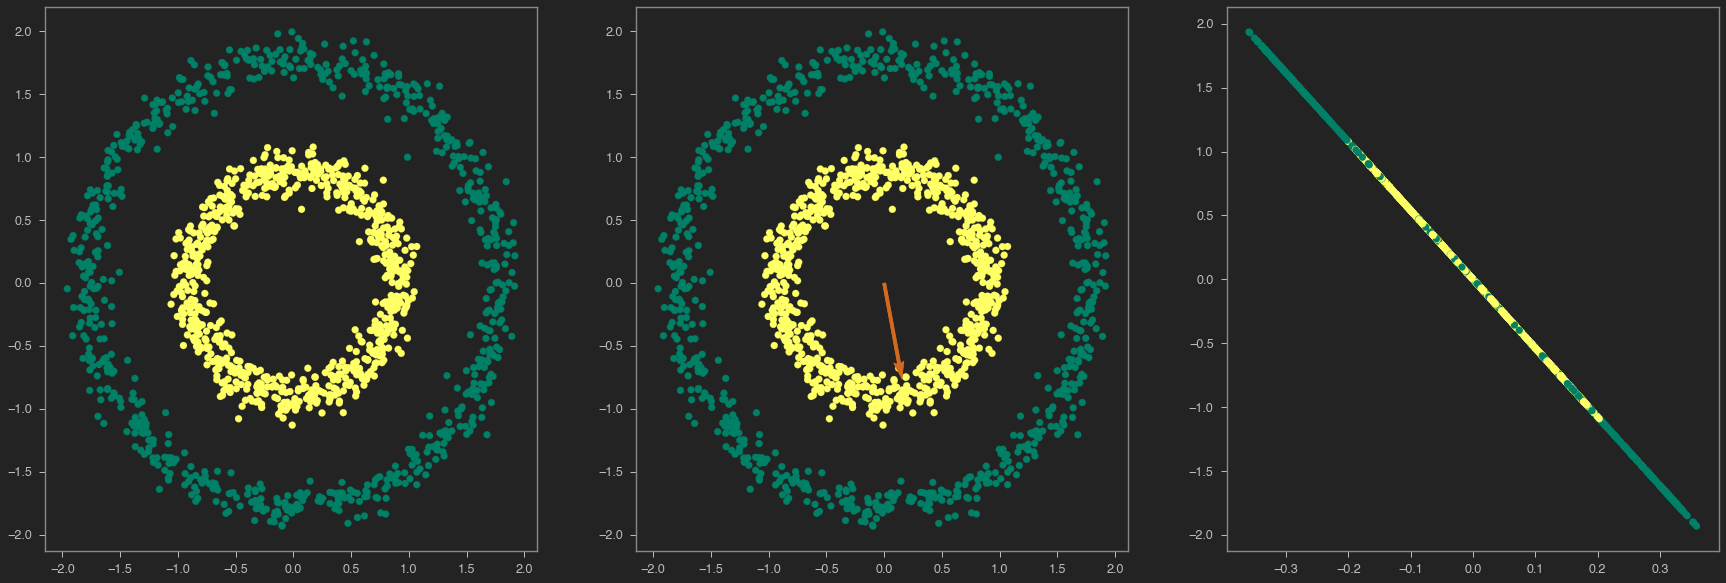

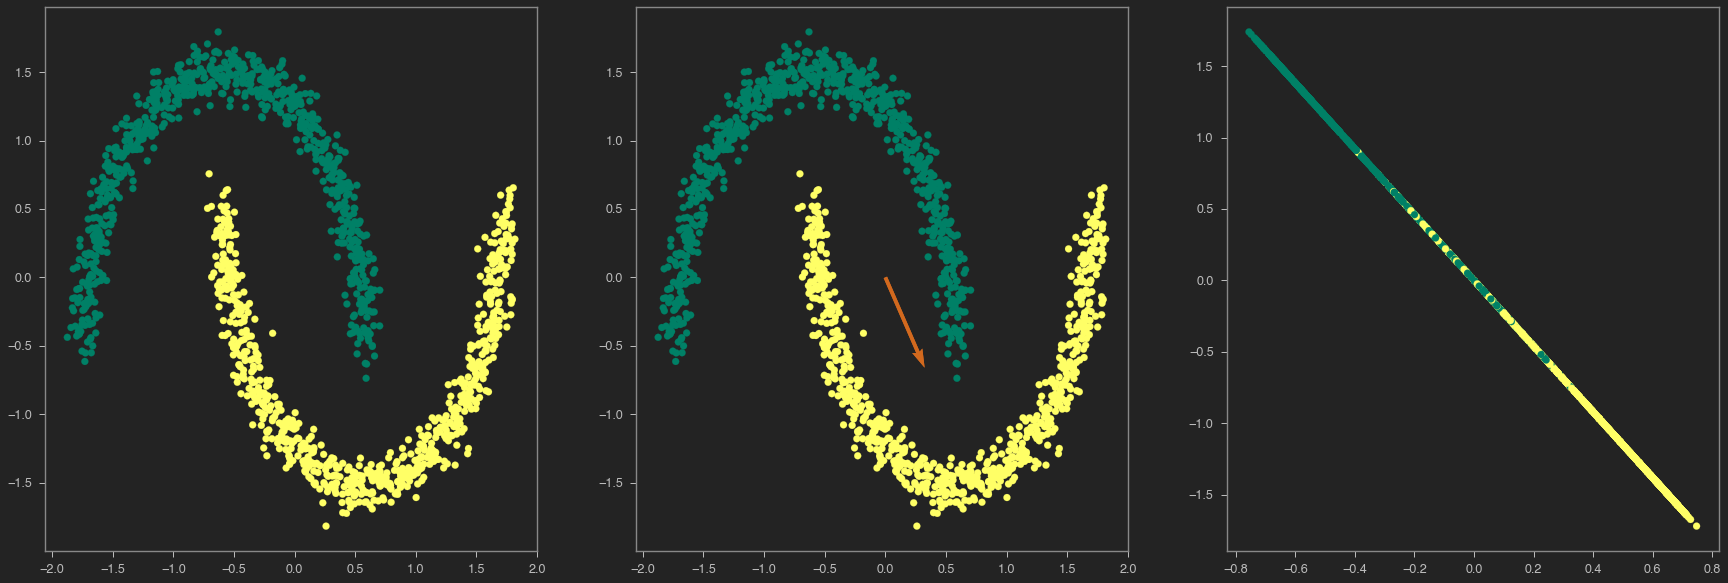

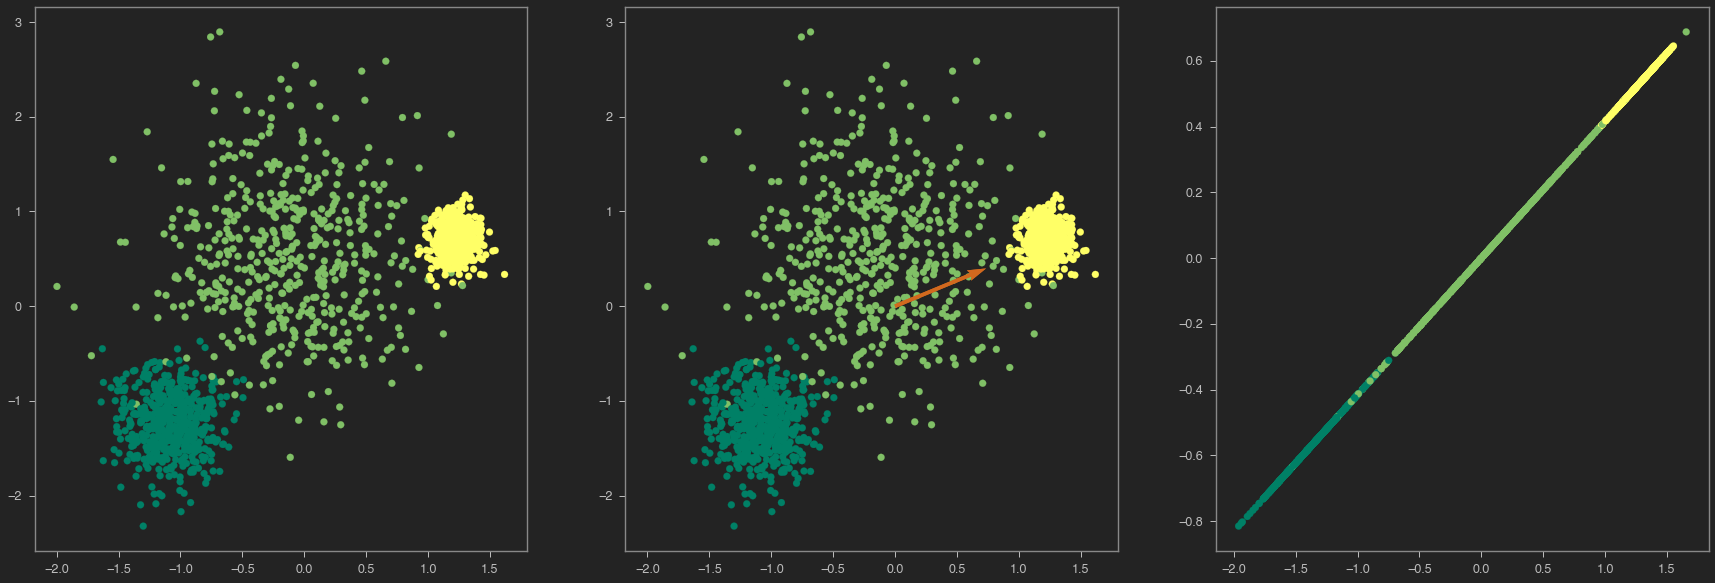

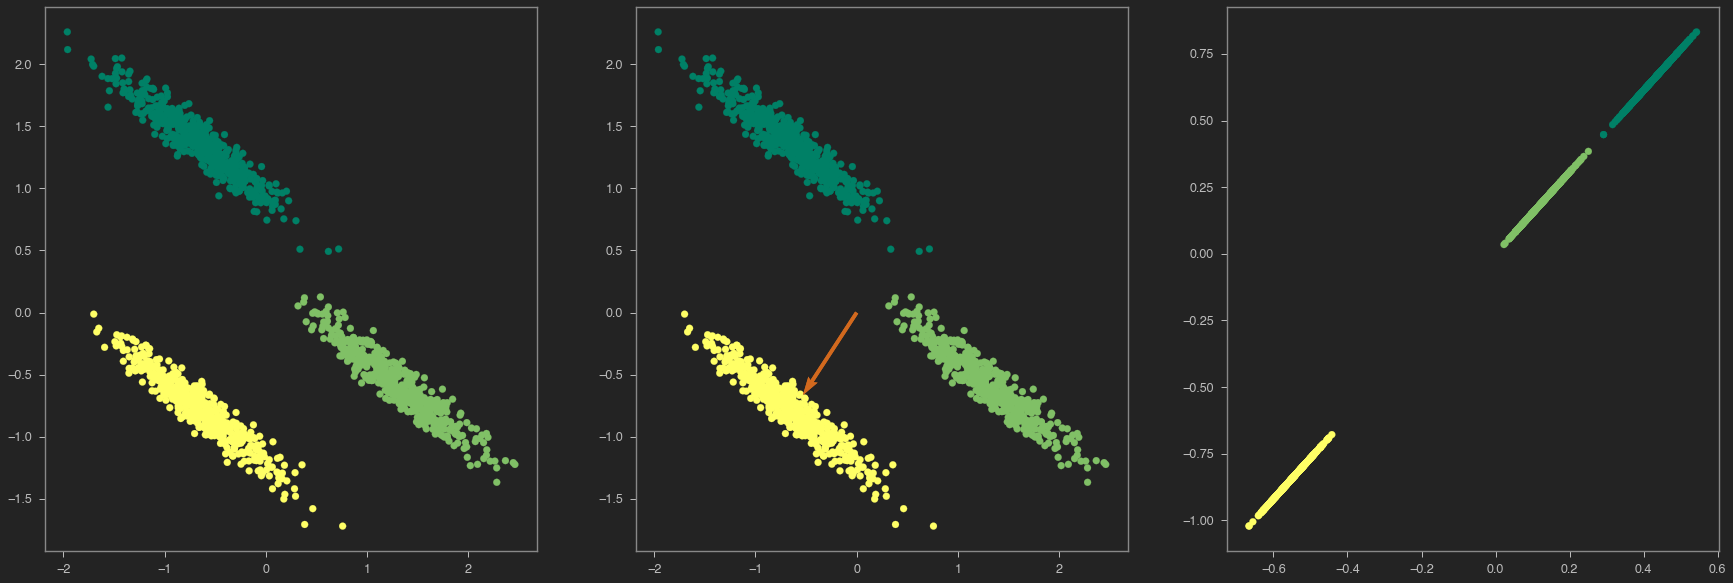

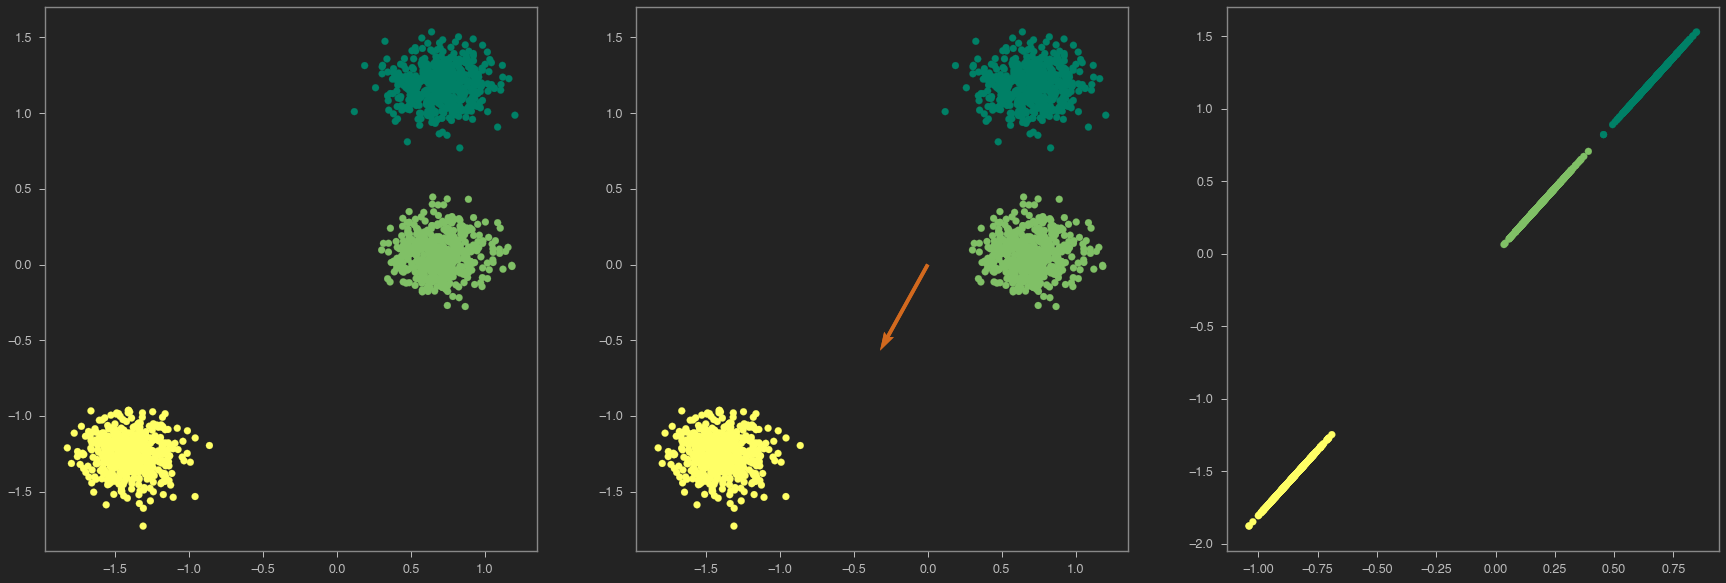

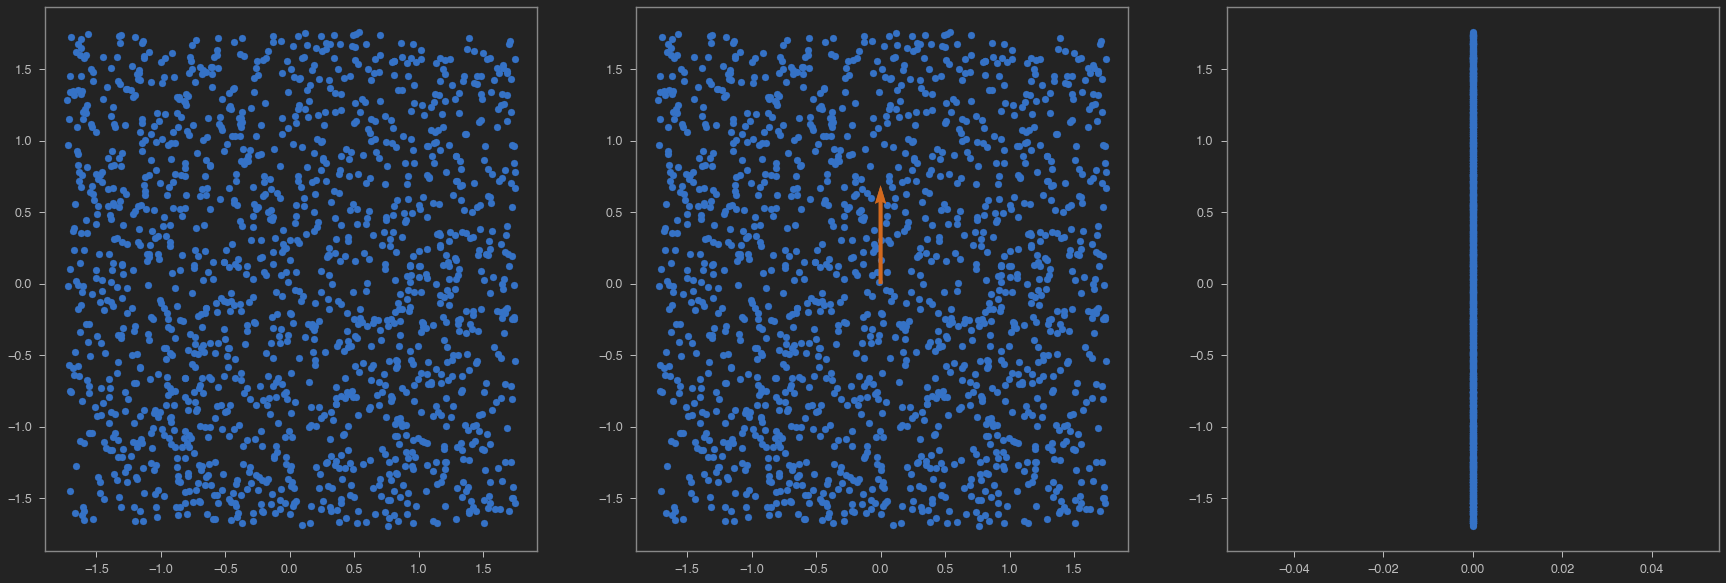

In [169]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles1 = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=8)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles1, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]
i=1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
    target_classes = np.unique(y)
     
    mean_vectors = []

    for cls in target_classes:
        if target_classes.size > 1:
            mean_vectors.append(np.mean(X[y == cls], axis=0))
        else:
            mean_vectors.append(np.mean(X, axis=0))
    data_mean = np.mean(X, axis=0).reshape(1, X.shape[1])

    B = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == i].shape[0]
        mean_vec = mean_vec.reshape(1, X.shape[1])
        mu1_mu2 = mean_vec - data_mean
        B += n * np.dot(mu1_mu2.T, mu1_mu2)
    s_matrix = []

    for cls, mean in enumerate(mean_vectors):
        Si = np.zeros((X.shape[1], X.shape[1]))
        for row in X[y == cls]:
            t = (row - mean).reshape(1, X.shape[1])
            Si += np.dot(t.T, t)
        s_matrix.append(Si)
    S = np.zeros((X.shape[1], X.shape[1]))
    for s_i in s_matrix:
        S += s_i
    S_inv = np.linalg.pinv(S)

    S_inv_B = S_inv.dot(B)

    eig_vals, eig_vecs = np.linalg.eig(S_inv_B)
    eigen_values_sorted = np.argsort(eig_vals)
    eig_vecs = eig_vecs.T
    max_eig = eigen_values_sorted[1]
    min_eig = eigen_values_sorted[0]
    #print(eig_vecs)
    #print("Max EigenValue:",eig_vecs[max_eig])
    #print(eig_vals)
    plt.subplot(1,3,2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
    plt.quiver([0,0],[0,0], eig_vecs[max_eig,0],eig_vecs[max_eig,1],color=['chocolate'],scale=5)

    #Projection
    proj = np.dot(X,eig_vecs[max_eig,:])
    proj = np.reshape(proj,(1500,1))
    X_new = proj*eig_vecs[max_eig,:]
    plt.subplot(1,3,3)
    plt.scatter(X_new[:,0],X_new[:,1],c=y,cmap="summer")